In [3]:
# Moving Avg -> Timeseries
# 1 Smoothing data
# 2 Forcasting / Predition

# Forcasting Algorithm Using:

# ARIMA

In [5]:
# # Take subset of Dataset for calculate avg
# Technique for  making subset
# 1 Simple Moving Avg -> uses sliding window 
# 2 Cammulative Moving Avg ->
# 3 Exponential weighted Moving Avg ->


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("D:\\Python\\ClassRoom\\Perform EDA on Temperature data\\temperature.csv")
print(df)

                  datetime   Vancouver    Portland  San Francisco     Seattle  \
0      2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1      2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2      2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3      2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4      2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   
...                    ...         ...         ...            ...         ...   
45248  2017-11-29 20:00:00         NaN  282.000000            NaN  280.820000   
45249  2017-11-29 21:00:00         NaN  282.890000            NaN  281.650000   
45250  2017-11-29 22:00:00         NaN  283.390000            NaN  282.750000   
45251  2017-11-29 23:00:00         NaN  283.020000            NaN  282.960000   
45252  2017-11-30 00:00:00         NaN  282.280000            NaN  283.040000   

       Los Angeles   San Di

In [15]:
df = df[['datetime','Boston']]
df['datetime'] = pd.to_datetime(df['datetime'])

In [20]:
# df.info()
df.isna().sum()
df = df.dropna()
df.isna().sum()


datetime    0
Boston      0
dtype: int64

In [54]:
#SMA -> rolling(window = 3)  
df['SMA3'] = df['Boston'].rolling(window = 3).mean()
df['SMA4'] = df['Boston'].rolling(window = 4).mean()
df['SMA10'] = df['Boston'].rolling(window = 10).mean()




In [26]:
df['SMA3']

1               NaN
2               NaN
3        287.195921
4        287.231672
5        287.277251
            ...    
45248    288.630000
45249    287.753333
45250    286.013333
45251    284.043333
45252    282.253333
Name: SMA3, Length: 45250, dtype: float64

In [34]:
df


,datetime,Boston,SMA3,SMA4
1,2012-10-01 13:00:00,287.170000,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461
...,...,...,...,...
45248,2017-11-29 20:00:00,288.080000,288.630000,288.200000
45249,2017-11-29 21:00:00,286.020000,287.753333,287.977500
45250,2017-11-29 22:00:00,283.940000,286.013333,286.800000
45251,2017-11-29 23:00:00,282.170000,284.043333,285.052500


In [42]:
# (287.231+287.186+287.277)/3
# (287.231+287.186+287.170000)/3

df['SMA4']

1               NaN
2               NaN
3               NaN
4        287.216254
5        287.254461
            ...    
45248    288.200000
45249    287.977500
45250    286.800000
45251    285.052500
45252    283.195000
Name: SMA4, Length: 45250, dtype: float64

In [55]:
df_p = df.head(100) 

In [56]:
df_p

,datetime,Boston,SMA3,SMA4,SMA10
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,NaN
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,NaN
...,...,...,...,...,...
96,2012-10-05 12:00:00,288.670000,288.680000,288.743750,289.0285
97,2012-10-05 13:00:00,289.100000,288.776667,288.785000,288.9945
98,2012-10-05 14:00:00,289.440000,289.070000,288.942500,288.9975
99,2012-10-05 15:00:00,289.750000,289.430000,289.240000,289.0535


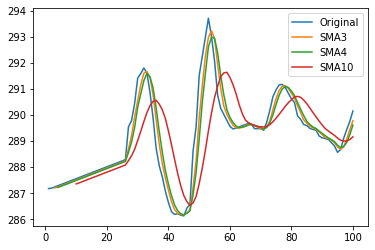

In [57]:
plt.plot(df_p['Boston'],label = 'Original')
plt.plot(df_p['SMA3'],label = 'SMA3')
plt.plot(df_p['SMA4'],label = 'SMA4')
plt.plot(df_p['SMA10'],label = 'SMA10')

plt.legend()

In [65]:
# df
df_c = df[['datetime','Boston']]
# df_c

In [66]:
df_c

,datetime,Boston
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092
3,2012-10-01 15:00:00,287.231672
4,2012-10-01 16:00:00,287.277251
5,2012-10-01 17:00:00,287.322831
...,...,...
45248,2017-11-29 20:00:00,288.080000
45249,2017-11-29 21:00:00,286.020000
45250,2017-11-29 22:00:00,283.940000
45251,2017-11-29 23:00:00,282.170000


In [85]:
# Commulative Moving Avg -> pd.expanding(min_periods = 2)
# minwindow har bar expand hota hai
df['CMA4'] = df_c['Boston'].expanding(min_periods = 4).mean()
df['CMA2'] = df_c['Boston'].expanding(min_periods = 2).mean()

In [87]:
df.head()

,datetime,Boston,SMA3,SMA4,SMA10,CMA4,CMA2
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN,NaN,287.178046
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN,NaN,287.195921
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,NaN,287.216254,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,NaN,287.237569,287.237569


In [73]:
(287.170000+287.186092+287.231672+287.277251)/4 #->n
(287.170000+287.186092+287.231672+287.277251+287.277251)/5 #->n+1
(287.170000+287.186092+287.231672+287.277251+287.277251+287.277251)/6# ->n+1



287.23658616666665

In [88]:
df_c = df.head(100)

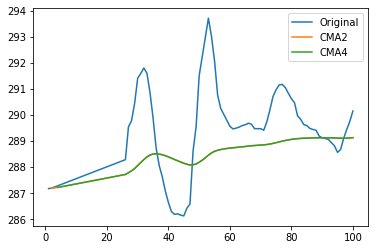

In [89]:
plt.plot(df_c['Boston'],label = 'Original')
plt.plot(df_c['CMA2'],label = 'CMA2')

plt.plot(df_c['CMA4'],label = 'CMA4')

plt.legend()

In [108]:
#exponential Moving avg ->exponentially weighted function -> 
# 1 adjust = True->
# 2 adjust -false ->
# df['EMA'] = df['Boston'].ewm(com = 0.3).mean()
# df['EMA'] = df['Boston'].ewm(span = 20).mean()
# df['EMA'] = df['Boston'].ewm(alpha = 0.3).mean()
df['EMA'] = df['Boston'].ewm(alpha = 0.3,adjust = False).mean()

In [91]:
df.head(10)

,datetime,Boston,SMA3,SMA4,SMA10,CMA4,CMA2,EMA
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN,NaN,NaN,287.170000
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN,NaN,287.178046,287.183075
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN,NaN,287.195921,287.220922
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,NaN,287.216254,287.216254,287.264375
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,NaN,287.237569,287.237569,287.309370
6,2012-10-01 18:00:00,287.368410,287.322831,287.300041,NaN,287.259376,287.259376,287.354792
7,2012-10-01 19:00:00,287.413990,287.368410,287.345620,NaN,287.281464,287.281464,287.400330
8,2012-10-01 20:00:00,287.459569,287.413990,287.391200,NaN,287.303727,287.303727,287.445899
9,2012-10-01 21:00:00,287.505149,287.459569,287.436779,NaN,287.326107,287.326107,287.491476
10,2012-10-01 22:00:00,287.550728,287.505149,287.482359,287.348569,287.348569,287.348569,287.537054


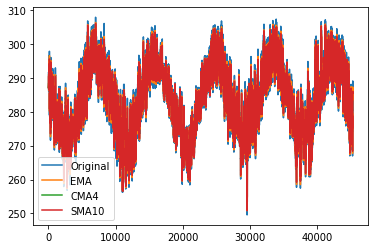

In [111]:
plt.plot(df['Boston'],label = 'Original')
plt.plot(df['EMA'],label = 'EMA')

plt.plot(df['CMA4'],label = 'CMA4')
plt.plot(df['SMA10'],label = 'SMA10')


plt.legend()


In [113]:
import seaborn as sns


In [114]:
df = pd.read_csv("D:\Python\ClassRoom\Polinomial Regression\housing.csv")
print(df.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


<AxesSubplot:>

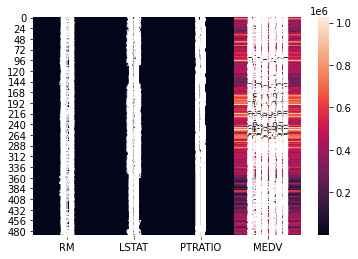

In [131]:
sns.heatmap(data = df ,annot= True)

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# vif factor is in between 1 to 5
# if it >5 then drop one column to achieve vif factor
for i in range(df.shape[1]):
    print(df.columns[i],'-->',variance_inflation_factor(df.values,i))

RM --> 118.38808961936905
LSTAT --> 8.209014631871812
PTRATIO --> 64.5755032599558
MEDV --> 28.218939396203833
